
# **Iris Flower Classification Dataset**


The Iris flower classification dataset comprises 150 samples of Iris flowers, categorized into three species:
1. Iris setosa
2. Iris versicolor
3. Iris virginica

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.
Attribute Information:

  1. Sepal length in cm
  2. Sepal width in cm
  3. Petal length in cm
  4. Petal width in cm
  5. Class

The dataset is widely used as a benchmark in machine learning for supervised classification tasks aiming to accurately classify Iris flowers based on their measurements.

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load dataset

In [2]:
df = pd.read_csv("/kaggle/input/iriscsv/Iris.csv")
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Preprocessing the dataset

In [3]:
# Drop the 'Id' column as it is not required for analysis
df = df.drop(columns=["Id"])

In [4]:
#Display basic statistics about the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [5]:
#checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
print('Shape of the dataset : ',df.shape)

Shape of the dataset :  (150, 5)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Display the number of samples for each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#Label encoding to convert class labels into numeric form
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [10]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2



# Exploratory Data Analysis

<Axes: xlabel='Species', ylabel='count'>

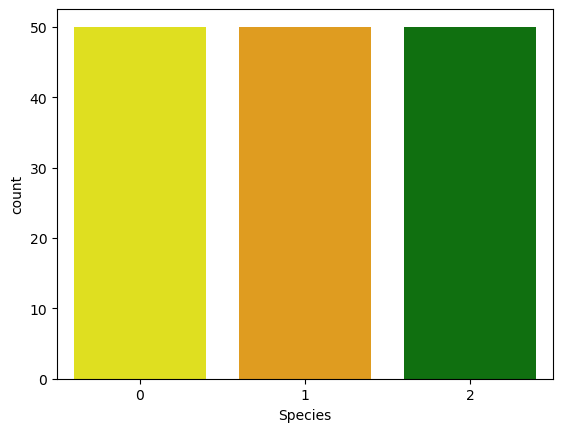

In [11]:
sns.countplot(x='Species',data=df,palette=['yellow','orange','g'])

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

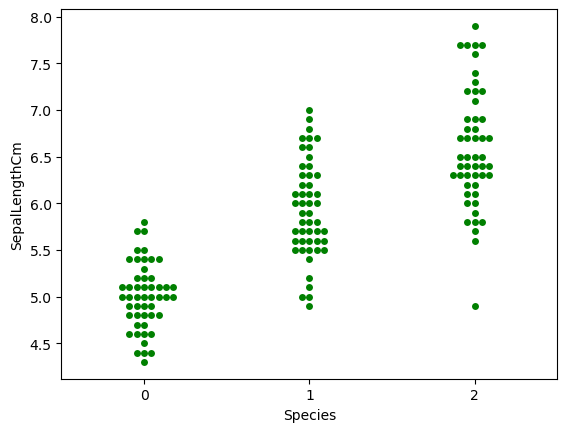

In [12]:
#analysing distribution of columns values
sns.swarmplot(x=df['Species'],y=df['SepalLengthCm'],color='g')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

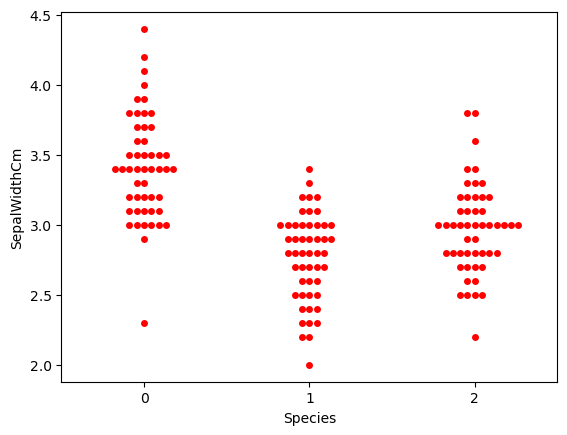

In [13]:
sns.swarmplot(x=df['Species'],y=df['SepalWidthCm'],color='r')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

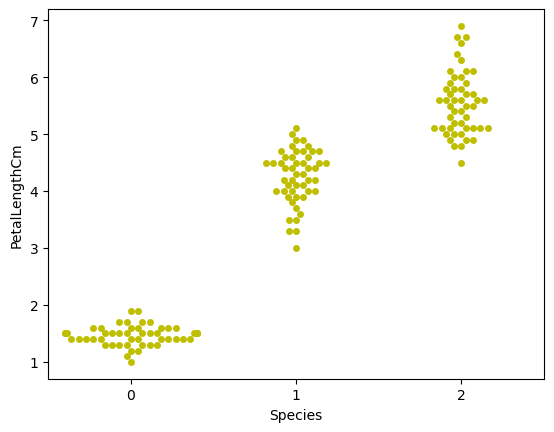

In [14]:
sns.swarmplot(x=df['Species'],y=df['PetalLengthCm'],color='y')

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

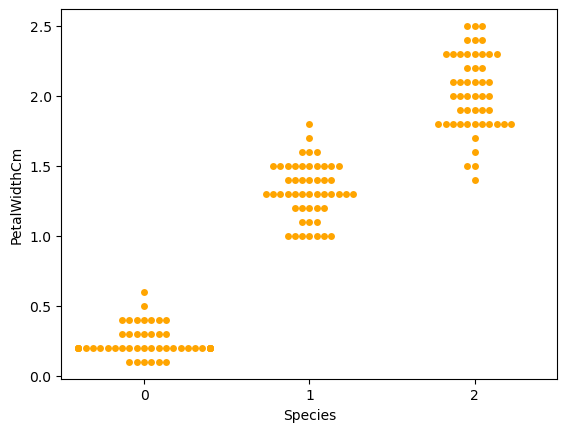

In [15]:
sns.swarmplot(x=df['Species'],y=df['PetalWidthCm'],color='orange')

<Axes: >

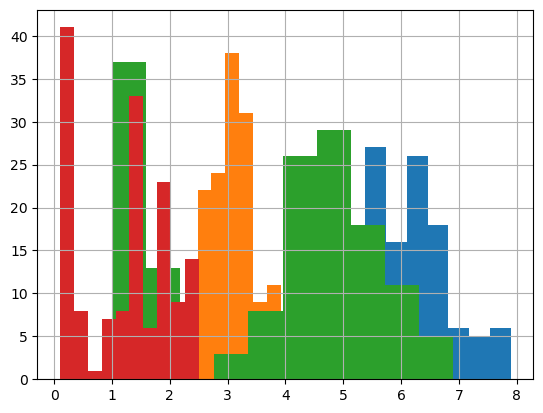

In [16]:
#Plotting the histogram of all features toghether
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

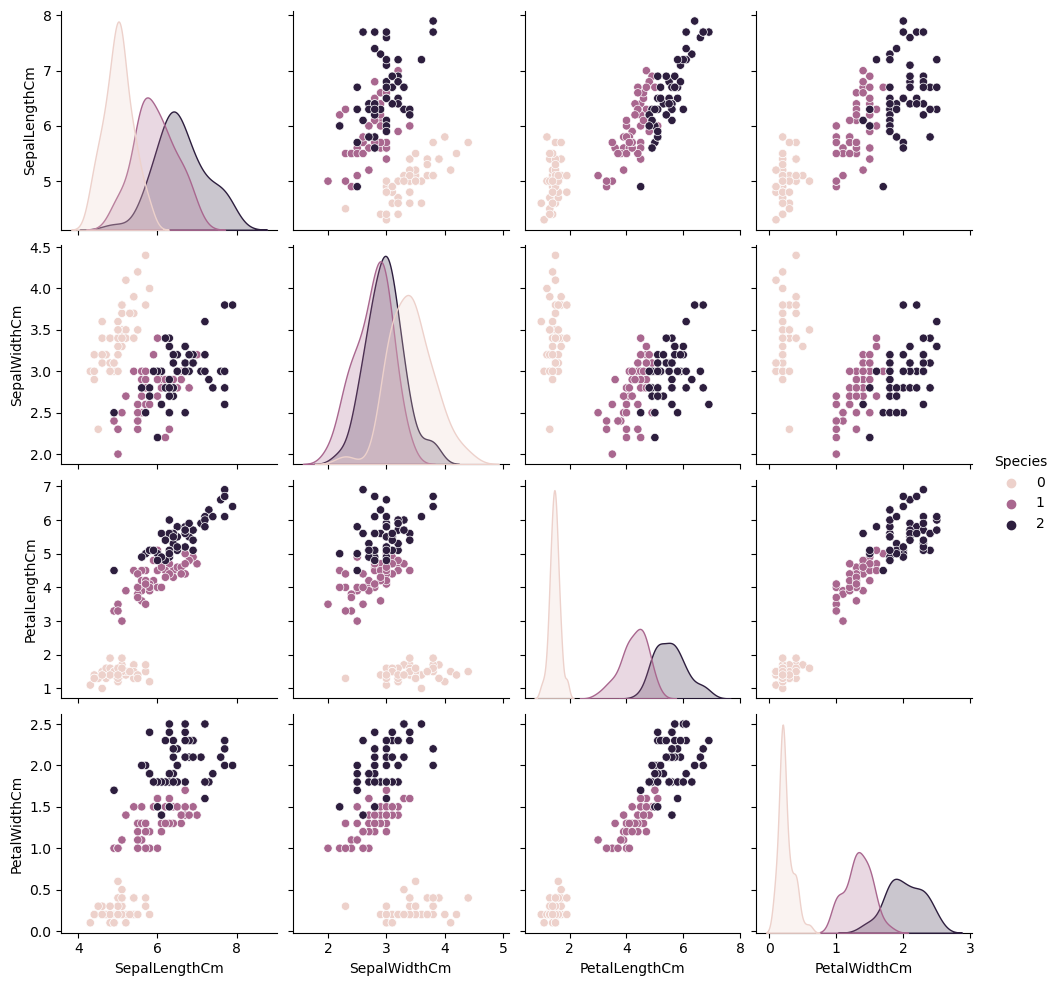

In [17]:
sns.pairplot(df,hue='Species')


# Correlation Matrix


A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [18]:
# Compute the correlation matrix 
df.corr().transpose()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

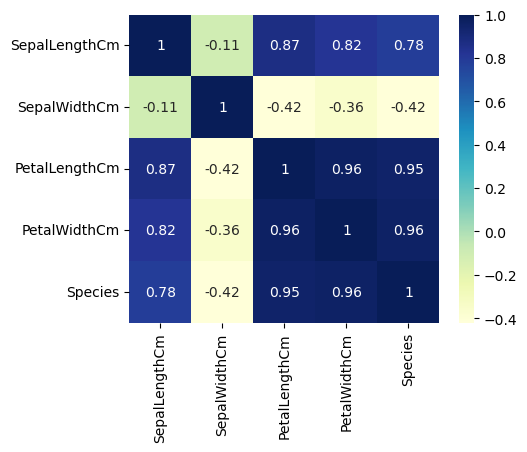

In [19]:
# display the correlation matrix using a heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='YlGnBu')

# Model Training

In [20]:
X = df.drop(columns=['Species'])
Y = df['Species']


In [21]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [22]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
logreg_Accuracy = logmodel.score(x_test, y_test) * 100
print("Accuracy (Logistic Regression): ", logreg_Accuracy)

Accuracy (Logistic Regression):  97.77777777777777


In [23]:
# K-nearest Neighbours Model (KNN)
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
knn_Accuracy = knnmodel.score(x_test,y_test)*100
print("Accuracy (KNN): ", knn_Accuracy)

Accuracy (KNN):  97.77777777777777


In [24]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
dt_Accuracy = dtmodel.score(x_test,y_test)*100
print("Accuracy (Decision Tree): ", dt_Accuracy)

Accuracy (Decision Tree):  95.55555555555556



# Confusion Matrix


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
y_pred1 = logmodel.predict(x_test)
y_pred2 = knnmodel.predict(x_test)
y_pred3 = dtmodel.predict(x_test)

In [27]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)


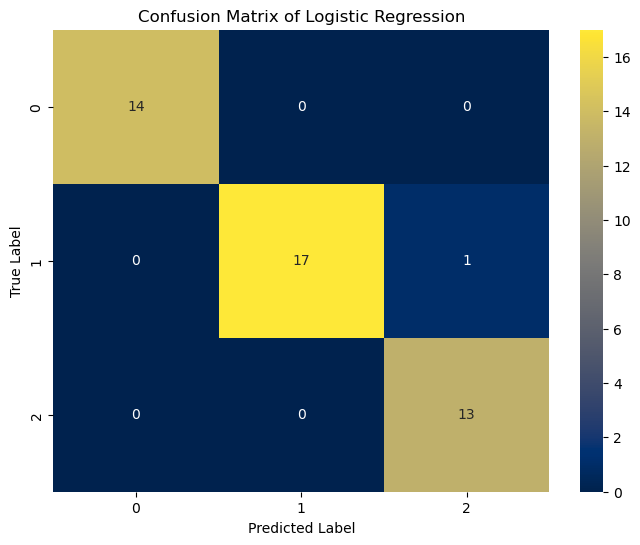

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='cividis', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

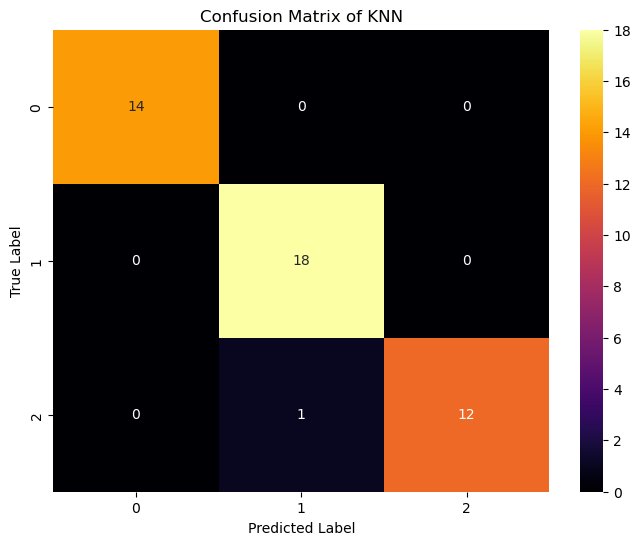

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='inferno', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()


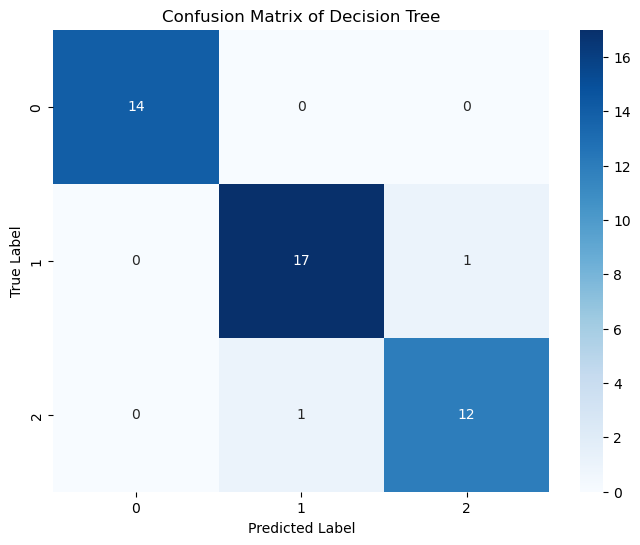

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

# Project Report

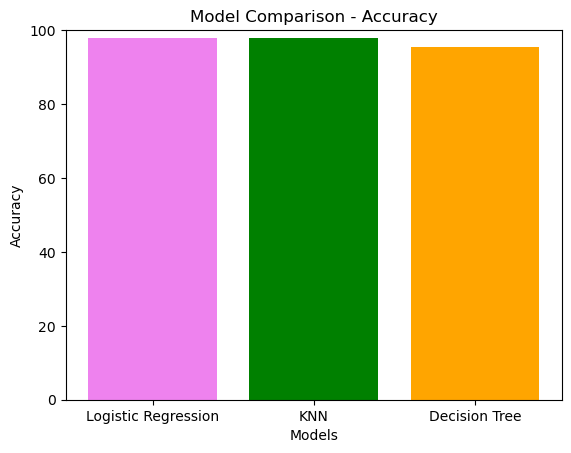

In [31]:
# Model Comparison - Visualization
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [logreg_Accuracy, knn_Accuracy, dt_Accuracy]

plt.bar(models, accuracies, color=['violet', 'green', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()
